In [1]:
## ---- Global Cell Set Doublet Post Processing Notebook ----
##
## Load Analysis Parameters (Parm1)
## Load Preprocessed/Downsampled Doublet Identified CDS Object
## Create Various Plots
## Apply Doublet Filtering
## Reformulate Partitions as Needed (and assigned cell types)
## Save Result As An R Data Object (CDS1)

In [3]:
## Load Monocle3 and Seurat Libraries
library(monocle3)
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(gridExtra)
library(Matrix)
library(rhdf5)

In [4]:
## Create a Working Input and Output Data Directory, If Id Does Not Exist
parentdir <- '/gpfs/group/torkamani/devans/'
datdir <- paste(parentdir, 'CDC2', sep = '')
if (!file.exists(datdir)) {
    dir.create(datdir)
}
setwd(datdir)

In [5]:
## Read the parameters file
ps <- read.table(file = 'parms.txt', stringsAsFactors = FALSE, header = TRUE)

In [6]:
## Read the previously preprocessed downsampled cell set data object,
down_stdycds <- readRDS(file = paste(ps$outdir, 'Aggregated.downsampled.QC.Doublets.Counted.rds', sep = ''))

In [6]:
## Read all the aggregated data into a Monocle cds object (as needed)
# stdycds <- load_cellranger_data(ps$indir)

In [7]:
## Read the top markers file (as needed)
# topmarkers <- read.table(paste(ps$outdir,
#             'Aggregated.downsampled.QC.TopAllMarkersPer.Rev1.tsv', sep = ''),
#                          header = TRUE, sep = '\t', row.names = NULL)

In [7]:
## Build a gene short name to gene id (Ensembl) lookup
short2geneid <- fData(down_stdycds)@rownames
names(short2geneid) <- fData(down_stdycds)@listData$gene_short_name

In [8]:
## Build a gene id (Ensembl) to gene short name lookup
geneid2short <- fData(down_stdycds)@listData$gene_short_name
names(geneid2short) <- fData(down_stdycds)@rownames

In [9]:
## Create variables for how cells sets are organized
cellgrps <- c('healthy', 'diseased', 'healthy', 'diseased', 'healthy', 'diseased')
cellpats <- c('ID Number 1', 'ID Number 1', 'ID Number 2', 'ID Number 2', 'ID Number 3', 'ID Number 3')

In [10]:
## Define and Assign Cell Types
celltypes6 <- c('1-Macrophages',
                '2-Endothelial Cells',
                '3-VSMCs',
                '4-Natural Killer Cells',
                '5-Cytotoxic T Lymphocytes',
                '6-B Lymphocytes')
parttypes <- c('MACRO.2',
               'ENDO.3.6',
               'VSMC.5.7',
               'NKC.8',
               'CYTOT.9',
               'BLYMPH.10') 

In [11]:
## Declare best genes for definiting cell types (TBD - no longer correct. See next notebook)
markers6 <- c('NRXN1', 'CLU', 'ICAM2',
                 'CD14', 'CD68', 'AIF1',
                 'VWF', 'EDN1', 'ECSCR',
                 'MKI67', 'UBE2C', 'TOP2A',
                 'ACTA2', 'TAGLN', 'MYL9',
                 'ACKR1', 'SPARCL1', 'PECAM1',
                 'CALD1', 'MGP', 'DCN',
                 'NKG7', 'XCL1', 'CTSW',
                 'CD8A', 'TRAC', 'CD2',
                 'MS4A1', 'CD79A', 'BANK1',
                 'CD69', 'CXCR4', 'IL7R',
                 'LILRA4', 'IRF7', 'CLEC4C',
                 'MZB1', 'JCHAIN', 'TNFRSF17',
                 'LST1', 'FCGR3B', 'S100A8',
                 'TPSAB1', 'CPA3', 'MS4A2')
gene_ids6 <- short2geneid[markers6]

In [37]:
dblet_cells <- which((colData(down_stdycds)$p0.05 > 1))
length(dblet_cells)
colData(down_stdycds)$doublet <- "No"
colData(down_stdycds)$doublet[dblet_cells] <- "Yes"
# colData(down_stdy_cds[])

[1] 3217

In [38]:
## Set up file for partition plot with legend showing assigned cell types
## This is mostly useless because it include the FAILQC cells
## Also not useful because its not the criteria used for tagging doublets (2 marker genes are needed)
plotfile <- 'Aggregated.downsampled.ShowDoublets.OriginalPartitions.WithLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [39]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <- plot_cells(down_stdycds, color_cells_by = "doublet", group_cells_by="partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [40]:
## Set up file for partition plot with legend showing assigned cell types
## This time with the FAILQC cells removed
## Also not useful because its not the criteria used for tagging doublets (2 marker genes are needed)
plotfile <- 'Aggregated.downsampled.ShowDoublets.Remixed.OriginalPartitions.WithLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [41]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <- plot_cells(down_stdycds[, colData(down_stdycds)$remix != 'FAILQC2.1.4.11-15'],
         color_cells_by = "doublet", group_cells_by="partition", label_cell_groups = FALSE,
         show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [42]:
## Set up file for partition plot with legend remixed
## Also not useful because its not the criteria used for tagging doublets (2 marker genes are needed)
plotfile <- 'Aggregated.downsampled.Remixed.OriginalPartitions.WithLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [43]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <- plot_cells(down_stdycds, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [44]:
## Generate Variouse cell sets
## Index for Cell set with unwanted partitions and doublets removed
filtcells <- which((colData(down_stdycds)$remix != 'FAILQC2.1.4.11-15') & 
                   (colData(down_stdycds)$p0.05 < 2))
## Index for Cell set with just doublets
dbletcells <- which(!(colData(down_stdycds)$p0.05 < 2))
## Index for Cell set with just unwanted partitions
rmsmpartcells <- which((colData(down_stdycds)$remix == 'FAILQC2.1.4.11-15'))
## Index for Cell Set with just unwanted partitions removed 
remixcells <- which((colData(down_stdycds)$remix != 'FAILQC2.1.4.11-15'))
length(filtcells)
length(dbletcells)
length(rmsmpartcells)
length(remixcells)

[1] 13070

[1] 3217

[1] 813

[1] 16287

In [20]:
## Write the results of the Doublet cells sets 
## First save the baseline cell data set
saveRDS(down_stdycds, file = paste(ps$outdir, 'GeneExcl/',
        'Aggregated.downsampled.Baseline.Repartitioned.rds', sep = ''))

In [34]:
## Write the results of the Doublet cells sets 
## Second save the associated barcodes
write.table(colnames(down_stdycds),
            file = paste(ps$outdir, 'GeneExcl/Rev1/Baseline.Cells.txt', sep = ''),
            quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(colnames(down_stdycds)[filtcells],
            file = paste(ps$outdir, 'GeneExcl/Rev1/Baseline.rmQC.rmDoublet.Cells.txt', sep = ''),
            quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(colnames(down_stdycds)[dbletcells],
            file = paste(ps$outdir, 'GeneExcl/Rev1/Baseline.Doublet.Cells.txt', sep = ''),
            quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(colnames(down_stdycds)[rmsmpartcells],
            file = paste(ps$outdir, 'GeneExcl/Rev1/Baseline.QC.Cells.txt', sep = ''),
            quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(colnames(down_stdycds)[remixcells],
            file = paste(ps$outdir, 'GeneExcl/Rev1/Baseline.rmQC.Cells.txt', sep = ''),
            quote = FALSE, col.names = FALSE, row.names = FALSE)

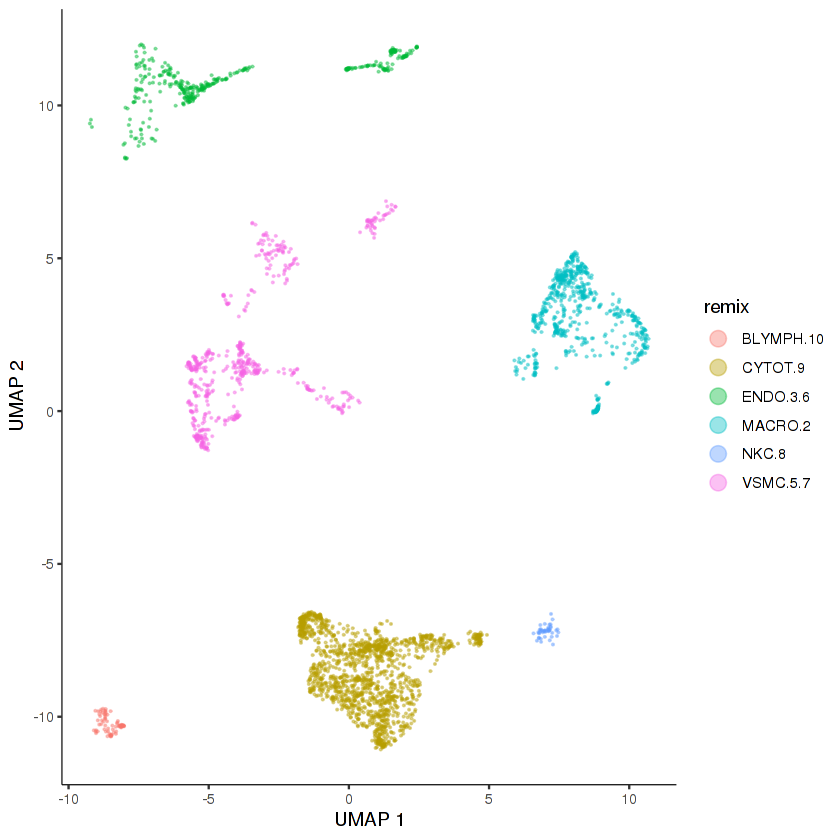

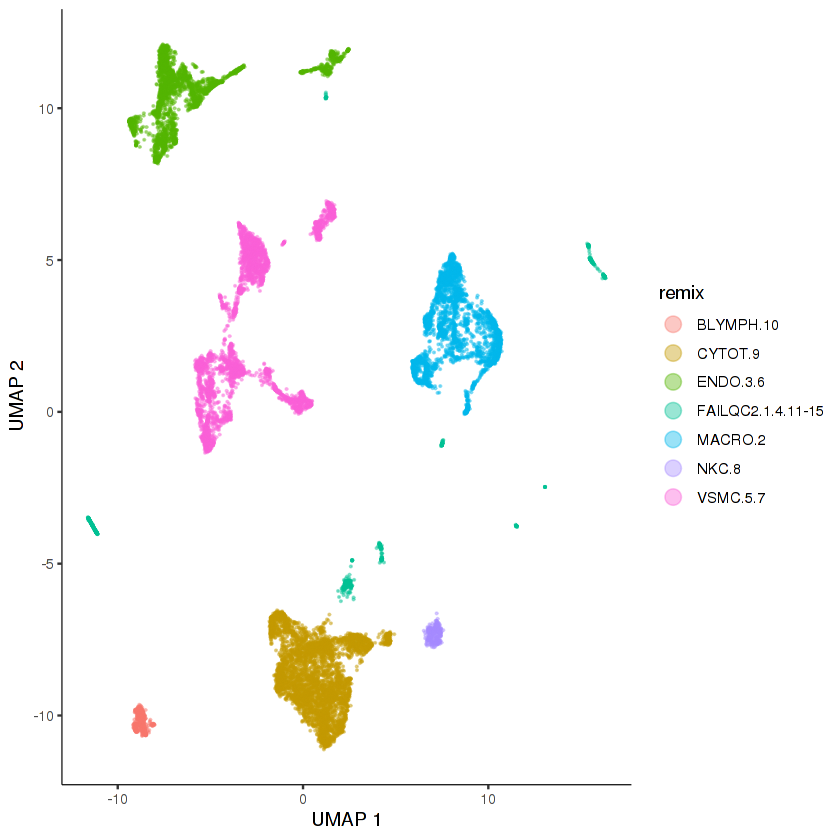

In [45]:
g1 <- plot_cells(down_stdycds[, dbletcells], color_cells_by = "remix", group_cells_by = "partition",
                 label_cell_groups = FALSE, show_trajectory_graph = FALSE, reduction_method = "UMAP",
                 cell_size = 0.1, alpha = .4)
g2 <- plot_cells(down_stdycds, color_cells_by = "remix", group_cells_by = "partition",
                 label_cell_groups = FALSE, show_trajectory_graph = FALSE, reduction_method = "UMAP",
                 cell_size = 0.1, alpha = .4)
print(g1)
print(g2)
g3 <- plot_cells(down_stdycds[, remixcells], color_cells_by = "doublet", group_cells_by = "partition",
                 label_cell_groups = FALSE, show_trajectory_graph = FALSE, reduction_method = "UMAP",
                 cell_size = 0.1, alpha = .4)


   No   Yes 
13070  3217 

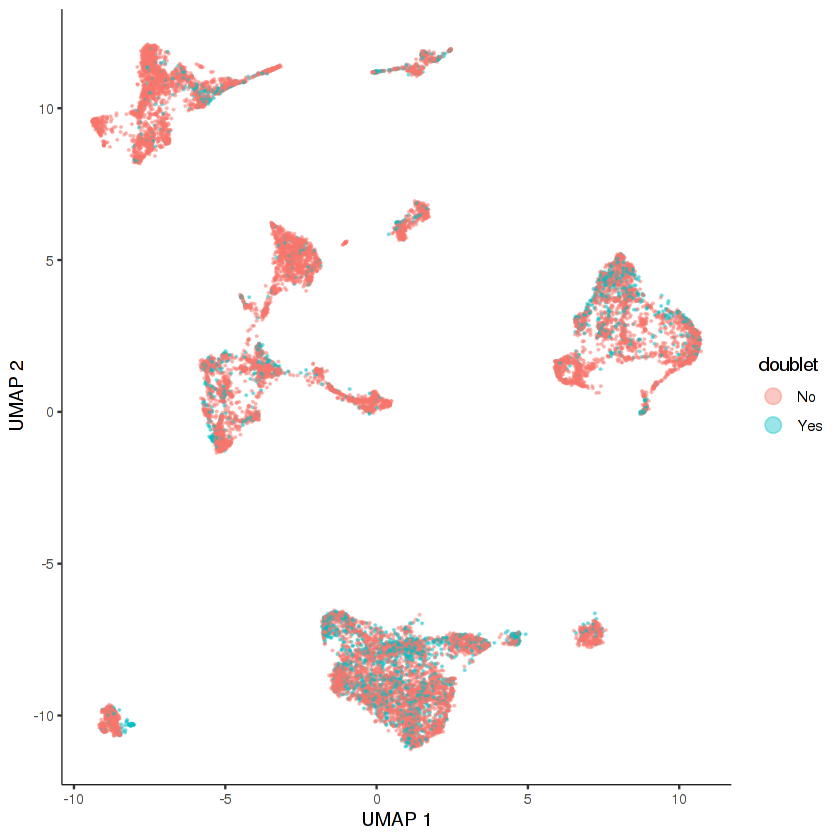

In [46]:
g3
table(colData(down_stdycds[, remixcells])$doublet)

In [47]:
## Set up file plot remixed partitions showing read doublets, showing remixed cell types
plotfile <- 'Aggregated.downsampled.ShowRealDoublets.Remix.WithLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')
pdf(plotfp, width = 12, height = 8)
print(g3)
dev.off()

png 
  2

In [19]:
## Cell set with unwanted partitions and doublets removed
qc_stdycds <- down_stdycds[, filtcells]

In [20]:
## Cell set with just doublets
dblt_stdycds <- down_stdycds[, dbletcells]

In [21]:
## Index for Cell Set with just unwanted partitions removed 
remix_stdycds <- down_stdycds[, remixcells]

In [22]:
## Process the data, without patient correction, doublets and unwanted partitions removed
qc_stdycds <- preprocess_cds(qc_stdycds, num_dim = 100)

In [23]:
## Get the UMAP components
qc_stdycds <- reduce_dimension(qc_stdycds, reduction_method = "UMAP")

In [24]:
## Cluster and Partition the data
qc_stdycds <- cluster_cells(qc_stdycds, reduction_method = 'UMAP')

In [225]:
## Set up file for partition plot with legend - remixed
plotfile <- 'Aggregated.downsampled.Remixed.NoDoublets.Reprocessed.WithLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [226]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <- plot_cells(qc_stdycds, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

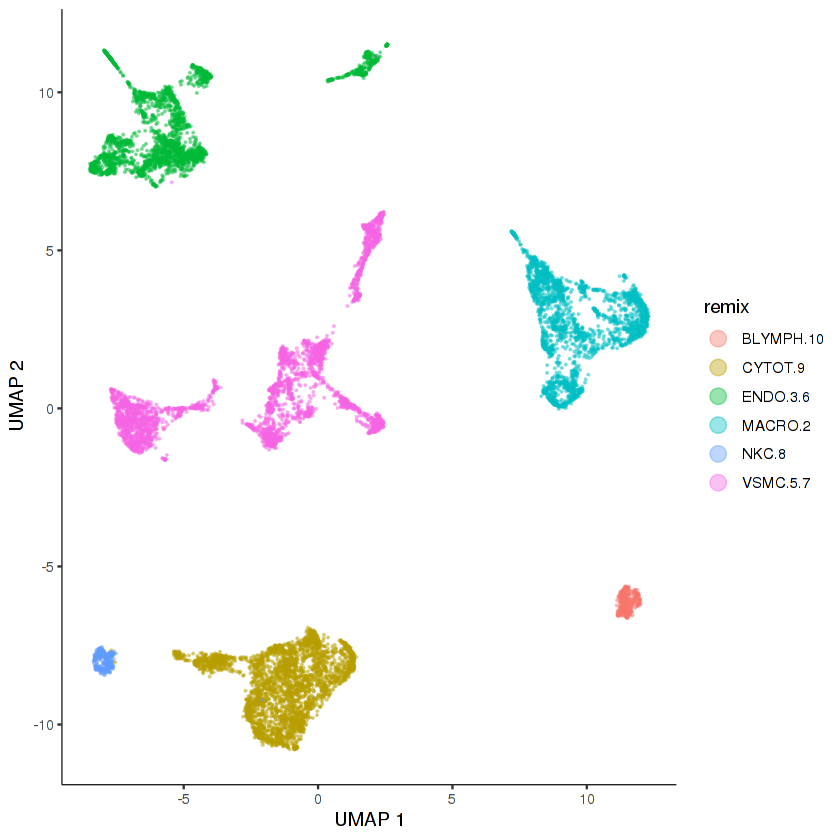

In [57]:
plot_cells(qc_stdycds, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)

In [ ]:
top1 <- plot_cells(qc_stdycds, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)

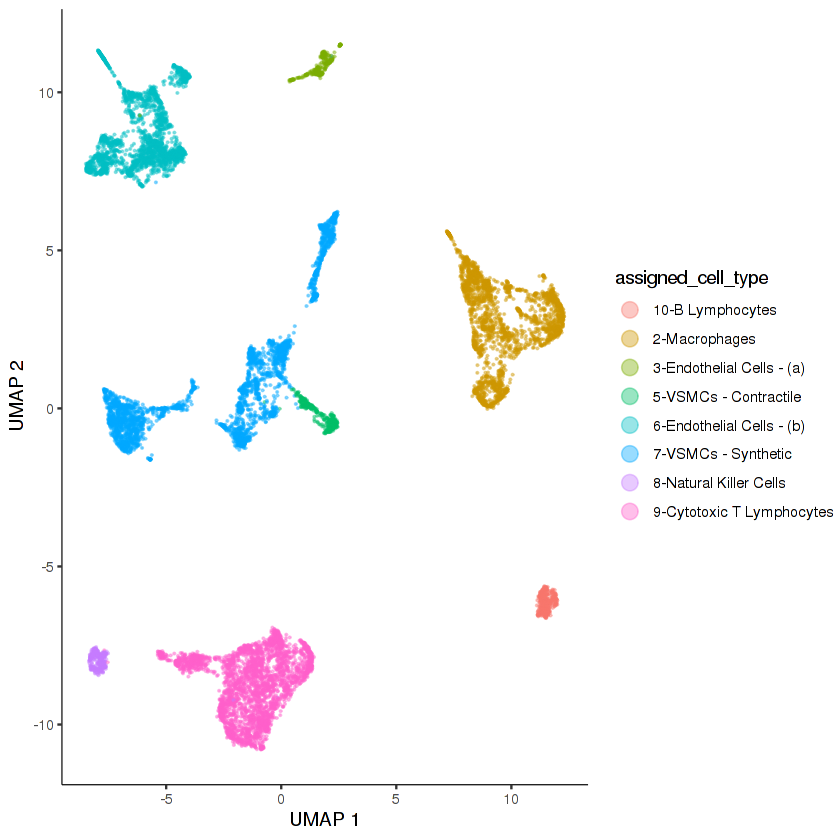

In [62]:
plot_cells(qc_stdycds, color_cells_by = "assigned_cell_type",
                   group_cells_by = "partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)

In [227]:
## Set up file for partition plot with legend - remixed
plotfile <- 'Aggregated.downsampled.Remixed.NoDoublets.Reprocessed.OriginalCellTypes.WithLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [228]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <-plot_cells(qc_stdycds, color_cells_by = "assigned_cell_type",
                   group_cells_by = "partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [229]:
## Set up file for partition plot with legend - remixed
plotfile <- 'Aggregated.downsampled.Remixed.NoDoublets.Reprocessed.NewPartitions.WithLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [230]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <-plot_cells(qc_stdycds, color_cells_by = "partition", group_cells_by = "partition", label_cell_groups = FALSE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [262]:
## Set up file for partition plot without legend - remixed
plotfile <- 'Aggregated.downsampled.Remixed.NoDoublets.Reprocessed.NewPartitions.NoLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [263]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <-plot_cells(qc_stdycds, color_cells_by = "partition", group_cells_by = "partition",
                   label_cell_groups = TRUE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [264]:
## Set up file for partition plot withno legend - remixed
plotfile <- 'Aggregated.downsampled.Remixed.NoDoublets.Reprocessed.OriginalCellTypes.NoLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [265]:
## Plot partitions with legend showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <-plot_cells(qc_stdycds, color_cells_by = "assigned_cell_type",
                   group_cells_by = "partition", label_cell_groups = TRUE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [ ]:
## Summary stats (These were cut and paste into the Gene Exclusion Study (revision 7))

In [63]:
## Percentages of doublets removed by condition, patient, and remixed partitions
100 * round(table(colData(dblt_stdycds)$condition)/table(colData(remix_stdycds)$condition), 3)
100 * round(table(colData(dblt_stdycds)$patient)/table(colData(remix_stdycds)$patient), 3)
100 * round(table(colData(dblt_stdycds)$remix)/table(colData(remix_stdycds)$remix), 3)


diseased  healthy 
    29.2     10.6 


ID Number 1 ID Number 2 ID Number 3 
       13.8        23.6        22.1 


BLYMPH.10   CYTOT.9  ENDO.3.6   MACRO.2     NKC.8  VSMC.5.7 
     14.3      31.2      11.7      20.6      11.9      13.1 

In [64]:
## New (Remixed and doublet filtered) Partition stats
## (These were cut and pasted into the Gene Exclusion Study (revision 7))

In [65]:
## Get remixed partition breakdown (cell counts by partition across patients, disease and healthy)
part_stats <- as.data.frame(matrix('', nrow = length(unique(colData(qc_stdycds)$remix)),
                                   ncol = 2 + length(cellgrps)), stringsAsFactors = FALSE)

In [66]:
## Add the cell groups and patient IDs to the first two rows
part_stats <- rbind(cellpats, cellgrps, part_stats)
## Add the partition names (cell types), and first two column row names as well
row.names(part_stats) <- c('Patient ID', 'Condition', celltypes6)
part_stats[1, c(7,8)] <- c('Total', 'Mean')
part_stats[2, c(7,8)] <- c('Cells', 'UMI')

In [67]:
# ## Get the partitions to summarize
# parts <- colData(down_stdycds)$remix[colData(down_stdycds)$remix %in% remixall]

In [68]:
parts <- colData(qc_stdycds)$remix
for (c in 1:dim(part_stats)[2]) {
    for (r in 3:dim(part_stats)[1]) {
        cells <- sum((parts == (parttypes[r - 2])) &
                     (colData(qc_stdycds)$patient ==  cellpats[c])  &
                     (colData(qc_stdycds)$condition ==  cellgrps[c]))
        part_stats[r, c] <- cells
    }
}
for (r in 3:dim(part_stats)[1]) {
    part_stats[r,7] <- sum(as.numeric(part_stats[r, 1:6]))
    part_stats[r,8] <- round(mean(colSums(exprs(qc_stdycds[,
                        colData(qc_stdycds)$remix == parttypes[r-2]]))), 0)
}

In [69]:
## (These were cut and paste into the Gene Exclusion Study (revision 7))
part_stats

,V1,V2,V3,V4,V5,V6,V7,V8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Patient ID,ID Number 1,ID Number 1,ID Number 2,ID Number 2,ID Number 3,ID Number 3,Total,Mean
Condition,healthy,diseased,healthy,diseased,healthy,diseased,Cells,UMI
1-Macrophages,204,1119,132,221,421,359,2456,7289
2-Endothelial Cells,1248,132,348,170,720,146,2764,5663
3-VSMCs,970,294,550,269,930,661,3674,5687
4-Natural Killer Cells,42,106,78,48,24,28,326,2436
5-Cytotoxic T Lymphocytes,165,509,952,886,351,539,3402,2935
6-B Lymphocytes,1,8,229,164,8,38,448,3220


In [70]:
## Get the doublet remix partitions (cell counts by partition across patients, disease and healthy)
dblet_stats <- as.data.frame(matrix('', nrow = length(unique(colData(dblt_stdycds)$remix)),
                                   ncol = length(cellgrps) + 2), stringsAsFactors = FALSE)

In [71]:
## Add the cell groups and patient IDs to the first two rows
dblet_stats <- rbind(cellpats, cellgrps, dblet_stats)
## Add the partition names (cell types), and first two column row names as well
row.names(dblet_stats) <- c('Patient ID', 'Condition', celltypes6)
dblet_stats[1, c(7,8)] <- c('Total', 'Mean')
dblet_stats[2, c(7,8)] <- c('Cells', 'UMI')

In [72]:
dbparts <- colData(dblt_stdycds)$remix
for (c in 1:dim(dblet_stats)[2]) {
    for (r in 3:dim(dblet_stats)[1]) {
        cells <- sum((dbparts == (parttypes[r - 2])) &
                     (colData(dblt_stdycds)$patient ==  cellpats[c])  &
                     (colData(dblt_stdycds)$condition ==  cellgrps[c]))
        dblet_stats[r, c] <- cells
    }
}
for (r in 3:dim(dblet_stats)[1]) {
    dblet_stats[r,7] <- sum(as.numeric(dblet_stats[r, 1:6]))
    dblet_stats[r,8] <- round(mean(colSums(exprs(dblt_stdycds[,
                        colData(dblt_stdycds)$remix == parttypes[r-2]]))), 0)
}

In [73]:
dblet_stats

,V1,V2,V3,V4,V5,V6,V7,V8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Patient ID,ID Number 1,ID Number 1,ID Number 2,ID Number 2,ID Number 3,ID Number 3,Total,Mean
Condition,healthy,diseased,healthy,diseased,healthy,diseased,Cells,UMI
1-Macrophages,31,204,30,118,77,178,638,10394
2-Endothelial Cells,56,56,61,108,33,52,366,7819
3-VSMCs,34,99,51,143,52,173,552,7492
4-Natural Killer Cells,9,10,7,8,2,8,44,3161
5-Cytotoxic T Lymphocytes,77,189,203,457,130,486,1542,3429
6-B Lymphocytes,1,2,15,52,1,4,75,4569


In [74]:
## Summaryize the Mean Cell UMI ratios across partition
## (These were cut and paste into the Gene Exclusion Study (revision 7))

In [75]:
## This data was cut and paste into the gene exclusion study
umistats <- cbind(part_stats[3:8,8], dblet_stats[3:8,8],
      round(as.integer(dblet_stats[3:8,8])/as.integer(part_stats[3:8,8]), 3))
colnames(umistats) <- c('-Dblt Mean UMI', "+Dblt Mean UMI", "FoldChange")
rownames(umistats) <- rownames(dblet_stats)[3:8]
umistats

,-Dblt Mean UMI,+Dblt Mean UMI,FoldChange
1-Macrophages,7289,10394,1.426
2-Endothelial Cells,5663,7819,1.381
3-VSMCs,5687,7492,1.317
4-Natural Killer Cells,2436,3161,1.298
5-Cytotoxic T Lymphocytes,2935,3429,1.168
6-B Lymphocytes,3220,4569,1.419


In [76]:
## Set up a new cell data object, with experminally reassigned partitions (save original)
exprmtl_cds <- qc_stdycds
colData(exprmtl_cds)$origparts <- partitions(exprmtl_cds)

In [77]:
table(partitions(exprmtl_cds))


   1    2    3    4    5    6    7    8    9   10 
2456 1851 2456 3403  448 1208  614  284   25  325 

In [78]:
## Actual reassignments 
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==1] <- 10
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==5] <- 10
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==4] <- 9
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==7] <- 9
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==2] <- 1
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==9] <- 2
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==3] <- 5
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==6] <- 4
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==8] <- 6
exprmtl_cds@clusters$UMAP$partitions[exprmtl_cds@clusters$UMAP$partitions==10] <- 3

In [79]:
## Store the annotated cell type in the cell data object
colData(exprmtl_cds)$assigned_cell_type <- as.character(partitions(exprmtl_cds))
colData(exprmtl_cds)$assigned_cell_type = dplyr::recode(colData(exprmtl_cds)$assigned_cell_type,
                                                "1"  = celltypes6[1],
                                                "2"  = celltypes6[2],
                                                "3"  = celltypes6[3],
                                                "4"  = celltypes6[4],
                                                "5"  = celltypes6[5],
                                                "6"  = celltypes6[6],
                                                "7"  = 'removed.07',
                                                "8"  = 'removed.08',
                                                "9"  = 'removed.09',
                                                "10" = 'removed.10')

In [339]:
## Set up file for partition plot with no legend - reassigned partitions
plotfile <- 'Aggregated.downsampled.QC.NoDoublets.Reprocessed.ReassignedPartitions.NoLegend.Rev1.pdf'
plotfp <- paste(ps$outdir, plotfile, sep = '')

In [340]:
## Plot partitions without legend, showing cell types
pdf(plotfp, width = 12, height = 8)
gtop1 <-plot_cells(exprmtl_cds, color_cells_by = "assigned_cell_type", group_cells_by = "partition",
                   label_cell_groups = TRUE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4)
gtop1
dev.off()

png 
  2

In [ ]:
## The next cells has been commented out because I don't want to overwrite
## Aggregated.downsampled.QC.NoDoublets.Repartitioned.rds, as it has a 
## prior UMAP layout representative of the layouts shown in the journal article

In [341]:
# # Save the new cell object to a file (CDS1 in outline)
# saveRDS(exprmtl_cds, file = paste(ps$outdir,
#         'Aggregated.downsampled.QC.NoDoublets.Repartitioned.rds', sep = ''))

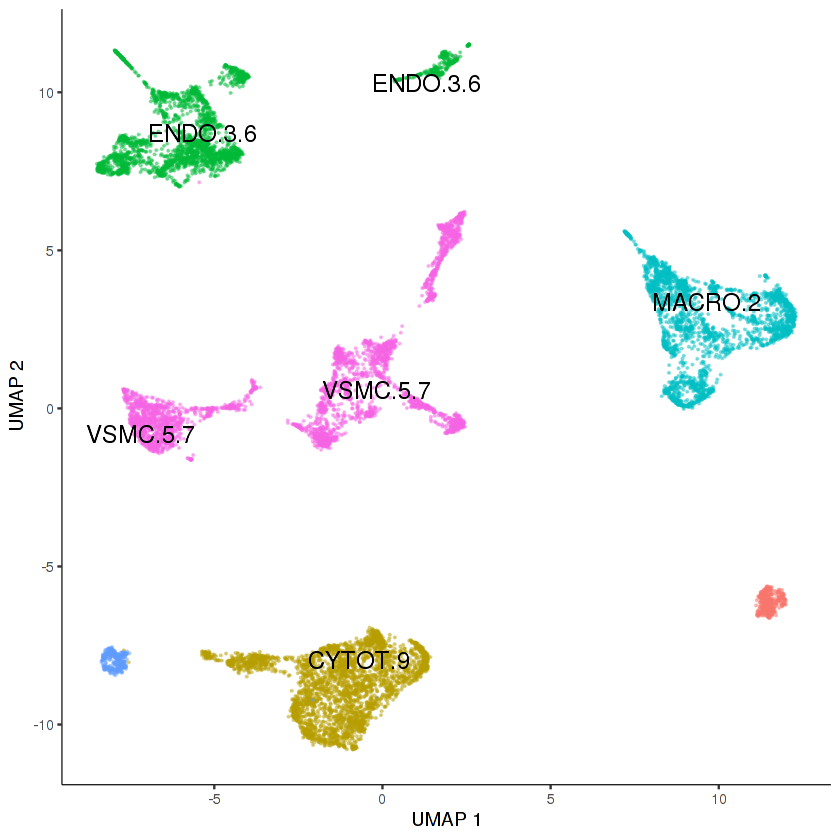

In [86]:
plot_cells(exprmtl_cds, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = TRUE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4,
          group_label_size = 5)

In [87]:
# # Read the saved cell object to a file (CDS1 in outline)
check_cds <- readRDS(file = paste(ps$outdir,
        'Aggregated.downsampled.QC.NoDoublets.Repartitioned.rds', sep = ''))

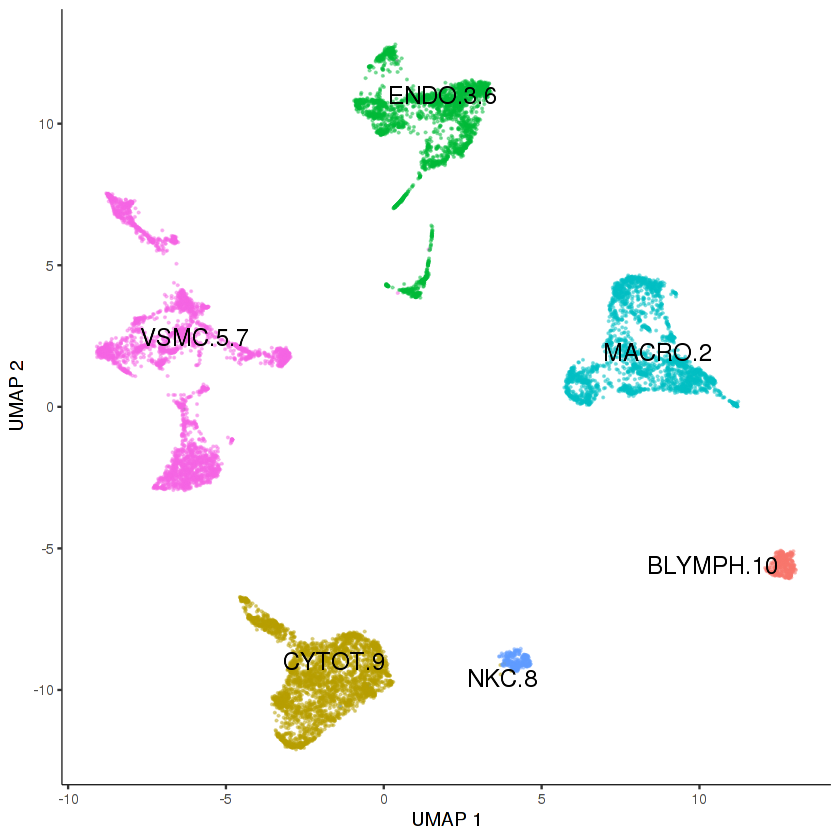

In [88]:
plot_cells(check_cds, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = TRUE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4,
          group_label_size = 5)

In [90]:
recomputed_cds <- exprmtl_cds
colData(recomputed_cds)$old_remix <- colData(check_cds)$remix

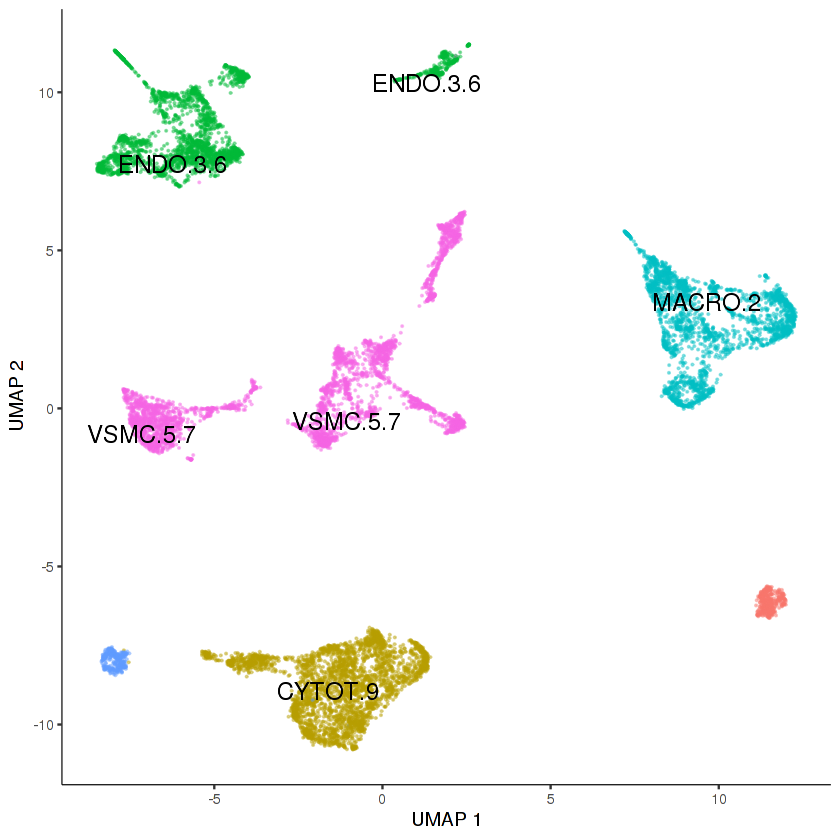

In [91]:
plot_cells(recomputed_cds, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = TRUE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4,
          group_label_size = 5)

In [93]:
cds_recent <- readRDS(file = paste(ps$outdir, 'GeneExcl/',
        'Aggregated.downsampled.Baseline.Repartitioned.rds', sep = ''))

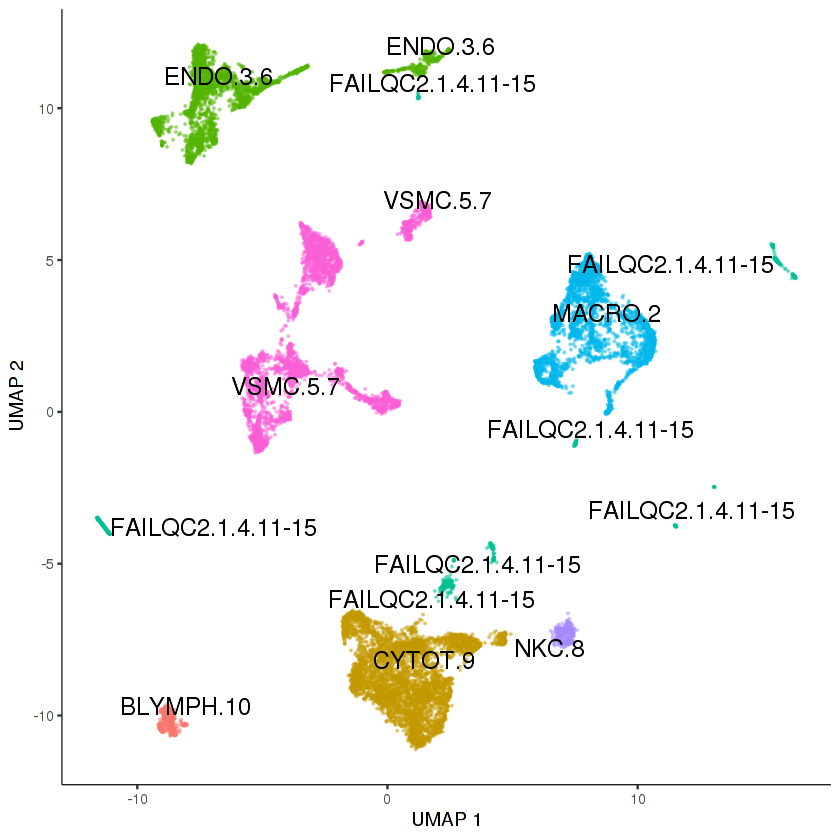

In [94]:
plot_cells(cds_recent, color_cells_by = "remix", group_cells_by = "partition", label_cell_groups = TRUE,
           show_trajectory_graph = FALSE, reduction_method = "UMAP", cell_size = 0.1, alpha = .4,
          group_label_size = 5)